In [53]:
import numpy as np
import matplotlib.pyplot as plt
from ControlProblem import OCP

In [54]:
Environment = OCP(N=100)
Environment.gradient_descent(max_iter=1000, tol=1e-6)

In [43]:
Simulation_Control = np.loadtxt("Simulation_Control.csv", delimiter=",")
time_grid = np.linspace(0,1,101)
time_grid[0:-1].shape
Simulation_Control.shape[0]
#Simulation_Control[0]

200

In [ ]:
min_valu = np.inf
for i in range(1,200):
    if np.min(Simulation_Control[i]) < min_valu:
        min_valu = np.min(Simulation_Control[i])
        print(f"Neue min Kontrolle: {min_valu} in Trajektorie {i}")
min_valu

Neue min Kontrolle: -1.3422546577590173 in Trajektorie 1
Neue min Kontrolle: -1.5883392406280983 in Trajektorie 7
Neue min Kontrolle: -1.7095545757837232 in Trajektorie 8
Neue min Kontrolle: -1.9873726080281724 in Trajektorie 17
Neue min Kontrolle: -2.0005788272494396 in Trajektorie 36


np.float64(-2.0005788272494396)

In [36]:
max_valu = -np.inf
for i in range(1,200):
    if np.max(Simulation_Control[i]) > max_valu:
        max_valu = np.max(Simulation_Control[i])
        print(f"Neue max Kontrolle: {max_valu} in Trajektorie {i}")

max_valu

Neue max Kontrolle: -0.32097383740359997 in Trajektorie 1
Neue max Kontrolle: -0.2518283395174212 in Trajektorie 2
Neue max Kontrolle: -0.21318467174701777 in Trajektorie 4
Neue max Kontrolle: -0.18282351939989028 in Trajektorie 5
Neue max Kontrolle: -0.17513428824543809 in Trajektorie 13
Neue max Kontrolle: -0.14268008757915362 in Trajektorie 45
Neue max Kontrolle: -0.06182829675951218 in Trajektorie 51
Neue max Kontrolle: -0.06148269951698637 in Trajektorie 106


np.float64(-0.06148269951698637)

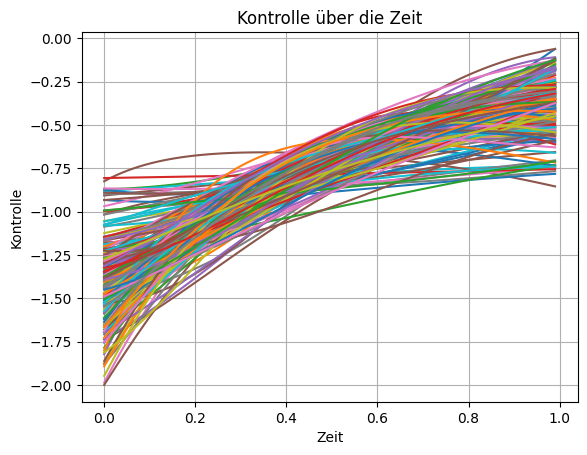

In [38]:
for i in range(1,200):
    plt.plot(time_grid[0:-1], Simulation_Control[i])
plt.xlabel("Zeit")
plt.ylabel("Kontrolle")
plt.title("Kontrolle über die Zeit")
plt.grid()  
plt.show()

Simulation_Control.shape[0] -> Anzahl Trajektorien

Simulation_Control.shape[1] -> Anzahl Datenpunkte je Trajektorie

In [48]:
min_values = np.zeros(Simulation_Control.shape[1])
for i in range(Simulation_Control.shape[1]):
    min_values[i] = np.min(Simulation_Control[:,i])

max_values = np.zeros(Simulation_Control.shape[1])
for i in range(Simulation_Control.shape[1]):
    max_values[i] = np.max(Simulation_Control[:,i])

avg_values = np.zeros(Simulation_Control.shape[1])
for i in range(Simulation_Control.shape[1]):
    avg_values[i] = np.mean(Simulation_Control[:,i])

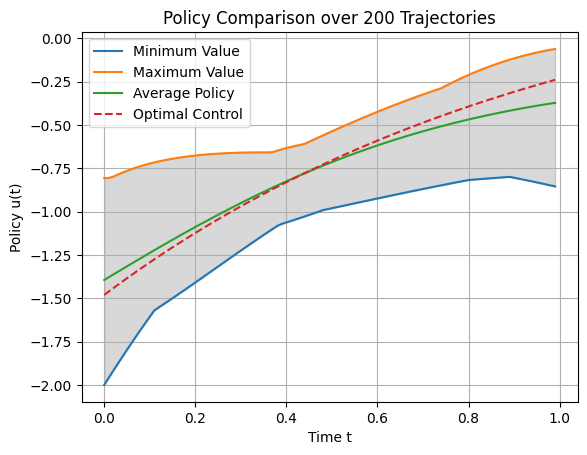

In [56]:
plt.plot(time_grid[0:-1], min_values, label="Minimum Value")
plt.plot(time_grid[0:-1], max_values, label="Maximum Value")
plt.plot(time_grid[0:-1], avg_values, label="Average Policy")
plt.plot(time_grid[0:-1], Environment.u[:-1], label="Optimal Control", linestyle="--")
plt.fill_between(time_grid[0:-1], min_values, max_values, color="gray", alpha=0.3)
plt.xlabel("Time t")
plt.ylabel("Policy u(t)")
plt.title("Policy Comparison over 200 Trajectories")
plt.grid()  
plt.legend()
plt.show()